# Techniques for the Assignment 2/2

JD Sports and Frasers Group as used as exmaples in this session.

## Download the required data

You need to download the daily prices from 02/03/2020 to 28/02/2022. Then set the last 20 days as the test set and the first 485 days (for this example, yours may vary) as the training set.

In [ ]:
# import required libraries or commands within a library
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
# Download JD Sports prices
JD=yf.download('JD.L',start='2020-03-02',end='2022-03-01')
FRAS=yf.download('FRAS.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

In [ ]:
JD

In [ ]:
FRAS

In [ ]:
FTSE

In [ ]:
#show the index of DataFrame
JD.index

In [ ]:
#check is there any point of JD index different from FRAS index
JD.index.difference(FRAS.index)

In [ ]:
#check is there any point of JD index different from FTSE index
JD.index.difference(FTSE.index)

In [ ]:
#What's the difference between this line and the above one?
FTSE.index.difference(JD.index)

In [ ]:
#drop the row
JD=JD.drop(['2020-12-22'])
FRAS=FRAS.drop(['2020-12-22'])

NameError: name 'JD' is not defined

In [ ]:
JD.head(1)

NameError: name 'JD' is not defined

### Training and Test sets

In [ ]:
# Drop the columns we don't need
JD=JD.drop(columns=['Open','High','Low','Close','Volume'])
FRAS=FRAS.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

NameError: name 'JD' is not defined

In [ ]:
# Training sets
JDtr=JD.iloc[0:484]
FRAStr=FRAS.iloc[0:484]
FTSEtr=FTSE.iloc[0:484]

NameError: name 'JD' is not defined

In [14]:
# Test set
JDte=JD.iloc[484:504]
FRASte=FRAS.iloc[484:504]
FTSEte=FTSE.iloc[484:504]

### Daily Returns

In [15]:
returns1=(JDtr['Adj Close']-JDtr.shift(1)['Adj Close'])/JDtr.shift(1)['Adj Close']
returns2=(FRAStr['Adj Close']-FRAStr.shift(1)['Adj Close'])/FRAStr.shift(1)['Adj Close']
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

In [16]:
JDtr['Return']=returns1
FRAStr['Return']=returns2
FTSEtr['Return']=returns3

/var/folders/h8/xwzntwqs39l3gz1z3ntcyxgw0000gn/T/ipykernel_51137/1787363699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JDtr['Return']=returns1
/var/folders/h8/xwzntwqs39l3gz1z3ntcyxgw0000gn/T/ipykernel_51137/1787363699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FRAStr['Return']=returns2
/var/folders/h8/xwzntwqs39l3gz1z3ntcyxgw0000gn/T/ipykernel_51137/1787363699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [17]:
JDte['Return']=(JDte['Adj Close']-JDte.shift(1)['Adj Close'])/JDte.shift(1)['Adj Close']
JDte.iloc[0,1]=(JDte.iloc[0,0]-JDtr.iloc[-1,0])/JDtr.iloc[-1,0]
FRASte['Return']=(FRASte['Adj Close']-FRASte.shift(1)['Adj Close'])/FRASte.shift(1)['Adj Close']
FRASte.iloc[0,1]=(FRASte.iloc[0,0]-FRAStr.iloc[-1,0])/FRAStr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

/var/folders/h8/xwzntwqs39l3gz1z3ntcyxgw0000gn/T/ipykernel_51137/846753662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JDte['Return']=(JDte['Adj Close']-JDte.shift(1)['Adj Close'])/JDte.shift(1)['Adj Close']
/var/folders/h8/xwzntwqs39l3gz1z3ntcyxgw0000gn/T/ipykernel_51137/846753662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FRASte['Return']=(FRASte['Adj Close']-FRASte.shift(1)['Adj Close'])/FRASte.shift(1)['Adj Close']
/var/folders/h8/xwzntwqs39l3gz1z3ntcyxgw0000gn/T/ipykernel_51137/8467536

## Descriptive Analytics

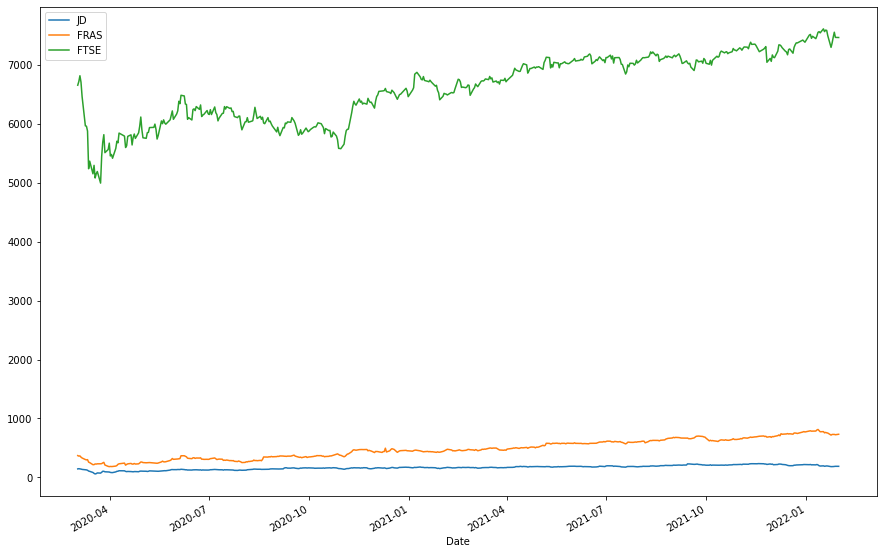

In [18]:
JDtr['Adj Close'].plot(figsize=(15,10), label='JD')
FRAStr['Adj Close'].plot(label='FRAS')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

In [19]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/10

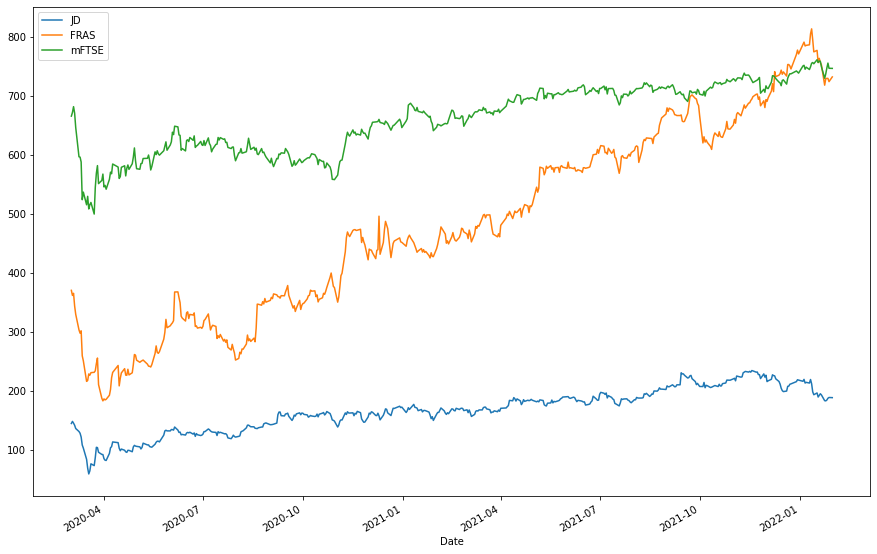

In [20]:
JDtr['Adj Close'].plot(figsize=(15,10), label='JD')
FRAStr['Adj Close'].plot(label='FRAS')
mFTSEtr['m Adj Close'].plot(label='mFTSE')
plt.legend()
plt.show()

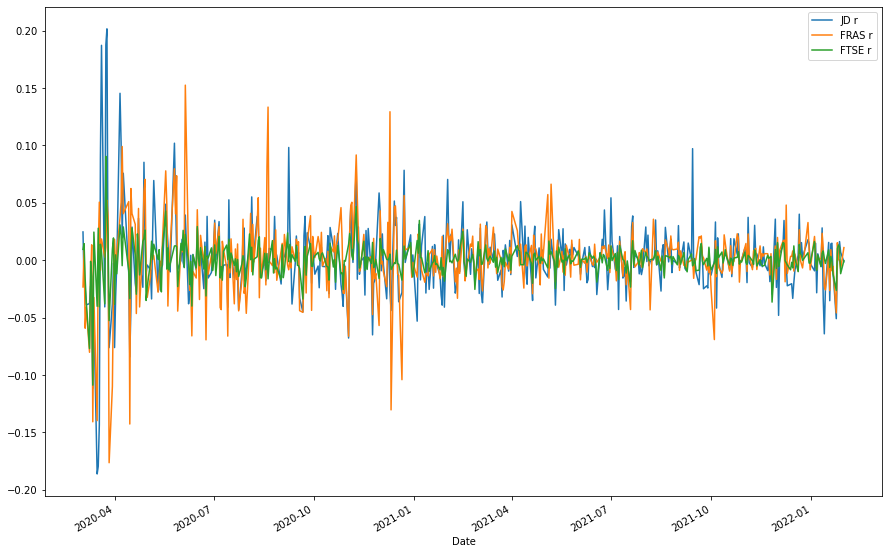

In [21]:
JDtr['Return'].plot(figsize=(15,10), label='JD r')
FRAStr['Return'].plot(label='FRAS r')
FTSEtr['Return'].plot(label='FTSE r')
plt.legend()
plt.show()

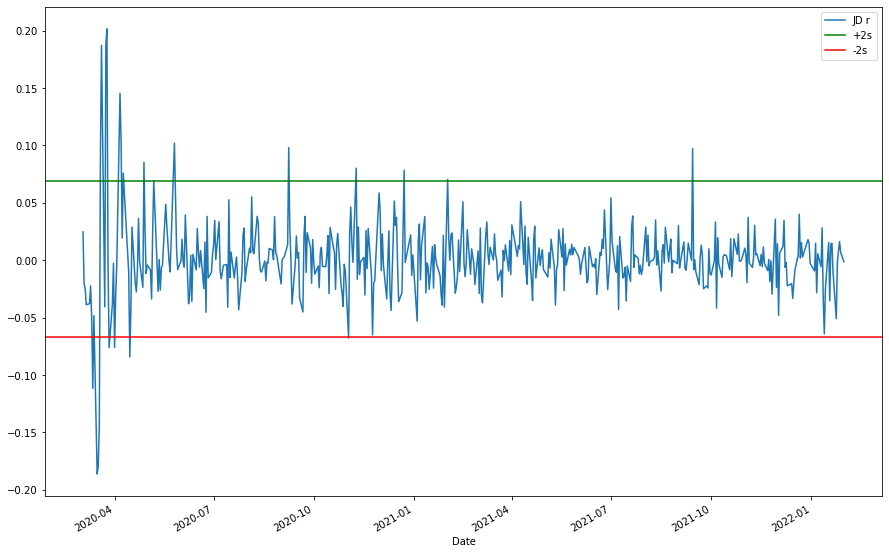

In [22]:
#Empirical Rules, Page 75 of Lecture 1
JDtr['Return'].plot(figsize=(15,10), label='JD r')
plt.axhline(y=JDtr['Return'].mean()+2*JDtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=JDtr['Return'].mean()-2*JDtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

In [23]:
#select rows by value 
pss=JDtr['Return'].mean()+2*JDtr['Return'].std()
JDtr.loc[JDtr['Return']>=pss]

,Adj Close,Return
Date,,
2020-03-19,63.878986,0.089359
2020-03-20,75.838791,0.187226
2020-03-24,86.418625,0.187741
2020-03-25,103.838341,0.201574
2020-04-06,93.398514,0.145450
2020-04-07,102.958359,0.102355
2020-04-09,112.918198,0.075838
2020-04-28,104.518333,0.085358
2020-05-07,110.838234,0.069471


In [24]:
nss=JDtr['Return'].mean()-2*JDtr['Return'].std()
JDtr.loc[JDtr['Return']<=nss]

,Adj Close,Return
Date,,
2020-03-12,107.718285,-0.111514
2020-03-16,83.438675,-0.186110
2020-03-17,68.458908,-0.179530
2020-03-18,58.639065,-0.143441
2020-03-27,95.418480,-0.076104
2020-04-01,84.578659,-0.076032
2020-04-15,102.318375,-0.084139
2020-11-02,138.197800,-0.067728


In [25]:
JDtr.loc[JDtr['Return']==JDtr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-16,83.438675,-0.18611


### Statistics

In [26]:
JDtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,166.580107,0.001115
std,36.476482,0.033792
min,58.639065,-0.186110
25%,141.527740,-0.013009
50%,167.077347,-0.000483
75%,189.766975,0.014284
max,234.000000,0.201574


In [27]:
FRAStr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,480.266115,0.001899
std,161.114714,0.030925
min,182.600006,-0.176332
25%,346.550003,-0.009929
50%,465.899994,0.002217
75%,614.625000,0.014247
max,813.500000,0.152542


In [28]:
FTSEtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


What can you find by comparing the above tables?

In [29]:
# Return to risk
JDtr['Return'].mean()/JDtr['Return'].std()

0.03298662903931391

### Boxplot

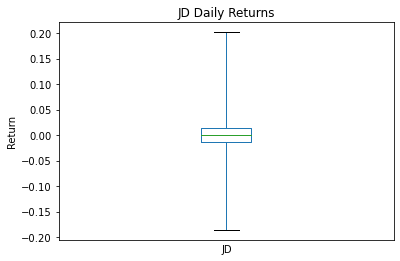

In [30]:
jdb=JDtr.boxplot(column='Return',whis=[0,100],grid=False)

jdb.set_title("JD Daily Returns",fontsize=12)
jdb.set_xlabel('JD', fontsize=10)
jdb.set_ylabel('Return', fontsize=10)
jdb.set_xticks([])
plt.show()

In [31]:
#Creturns=pd.concat([JDtr['Return'],FRAStr['Return'],FTSEtr['Return']],axis=1)
#Creturns.columns=['JD','FRAS','FTSE']

In [32]:
AllTrainingReturns=pd.DataFrame({'JD r':JDtr['Return'],'FRAS r':FRAStr['Return'],'FTSE r':FTSEtr['Return']})

In [33]:
AllTrainingReturns

,JD r,FRAS r,FTSE r
Date,,,
2020-03-02,NaN,NaN,NaN
2020-03-03,0.024681,-0.023243,0.009512
2020-03-04,-0.020568,0.009961,0.014498
2020-03-05,-0.024592,-0.059178,-0.016169
2020-03-06,-0.038810,-0.040769,-0.036210
...,...,...,...
2022-01-25,-0.001914,0.015320,0.010182
2022-01-26,0.007943,0.000686,0.013335
2022-01-27,0.016304,0.000000,0.011312


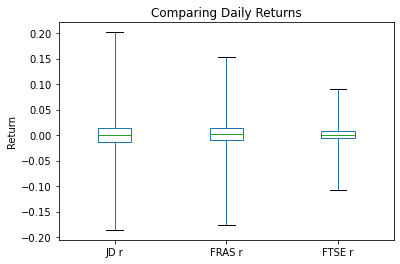

In [34]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False)
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### Histogram

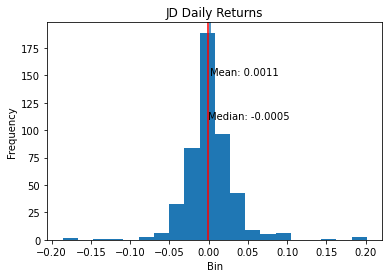

In [35]:
JDtr.hist(column='Return',bins=20,grid=False)

plt.title("JD Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(JDtr['Return'].mean())
plt.text(JDtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(JDtr['Return'].mean()))

plt.axvline(JDtr['Return'].median(),color='r')
plt.text(JDtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(JDtr['Return'].median()))

plt.show()

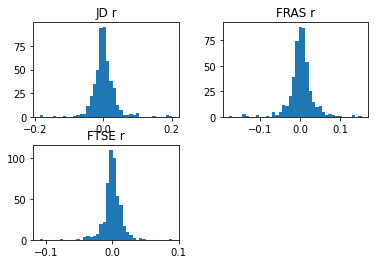

In [36]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=40,grid=False)
plt.show()

## Regression

In [37]:
# The three dataframes have the same column names, we should change the names and merge them together
JDtr.columns=['JD_Price','JD_Return']
FRAStr.columns=['FRAS_Price','FRAS_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([JDtr,FRAStr,FTSEtr],axis=1)

In [38]:
OverallTraining.head()

,JD_Price,JD_Return,FRAS_Price,FRAS_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,144.237717,NaN,370.000000,NaN,6654.899902,NaN
2020-03-03,147.797653,0.024681,361.399994,-0.023243,6718.200195,0.009512
2020-03-04,144.757690,-0.020568,365.000000,0.009961,6815.600098,0.014498
2020-03-05,141.197754,-0.024592,343.399994,-0.059178,6705.399902,-0.016169
2020-03-06,135.717834,-0.038810,329.399994,-0.040769,6462.600098,-0.036210


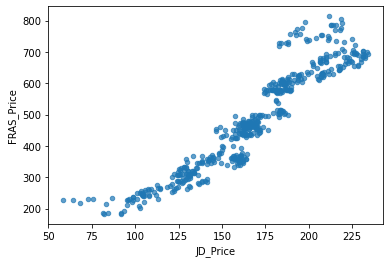

In [39]:
OverallTraining.plot.scatter(x='JD_Price',y='FRAS_Price',alpha=0.7)
plt.show()

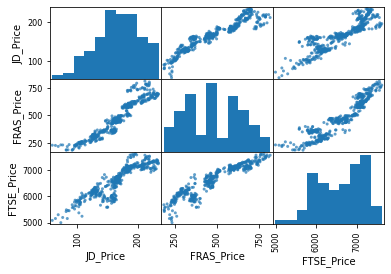

In [40]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7)
plt.show()

In [41]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')

,JD_Price,FRAS_Price,FTSE_Price
JD_Price,1.000000,0.937753,0.887275
FRAS_Price,0.937753,1.000000,0.933626
FTSE_Price,0.887275,0.933626,1.000000


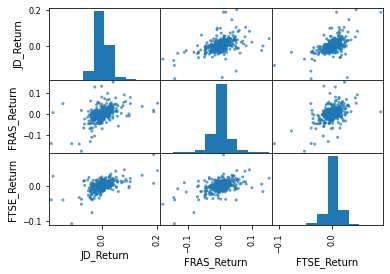

In [42]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7)
plt.show()

In [43]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,JD_Return,FRAS_Return,FTSE_Return
JD_Return,1.000000,0.455958,0.556758
FRAS_Return,0.455958,1.000000,0.488357
FTSE_Return,0.556758,0.488357,1.000000


In [44]:
JD_FRAS_reg=sfa.ols('JD_Price ~ FRAS_Price', data=OverallTraining).fit()

In [45]:
JD_FRAS_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               JD_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     3514.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.62e-223
Time:                        02:02:49   Log-Likelihood:                -1915.2
No. Observations:                 484   AIC:                             3834.
Df Residuals:                     482   BIC:                             3843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.6158      1.814     35.619      0.000      61.051      68.180
FRAS_Price     0.2123      0.004     59.279      0.000       0.205       0.219
==============================================================================
Omnibus:                       55.794   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.074
Skew:                          -0.748   Prob(JB):                     4.55e-20
Kurtosis:                       4.477   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

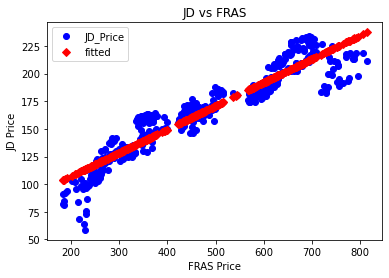

In [46]:
sa.graphics.plot_fit(JD_FRAS_reg,exog_idx='FRAS_Price',vlines=False)
plt.ylabel("JD Price")
plt.xlabel("FRAS Price")
plt.title("JD vs FRAS")
plt.show()

In [47]:
JD_FTSE_rreg=sfa.ols('JD_Return ~ FTSE_Return', data=OverallTraining).fit()

In [48]:
JD_FTSE_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              JD_Return   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.15e-40
Time:                        02:02:49   Log-Likelihood:                 1040.9
No. Observations:                 483   AIC:                            -2078.
Df Residuals:                     481   BIC:                            -2070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0007      0.001      0.521      0.603      -0.002       0.003
FTSE_Return     1.3180      0.090     14.700      0.000       1.142       1.494
==============================================================================
Omnibus:                      115.542   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3630.689
Skew:                          -0.177   Prob(JB):                         0.00
Kurtosis:                      16.427   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

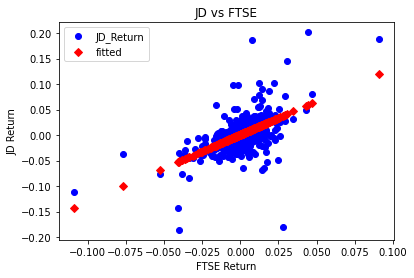

In [49]:
sa.graphics.plot_fit(JD_FTSE_rreg,exog_idx='FTSE_Return',vlines=False)
plt.ylabel("JD Return")
plt.xlabel("FTSE Return")
plt.title("JD vs FTSE")
plt.show()

In [50]:
# Multiple Regression
JD_FRAS_FTSE_reg=sfa.ols('JD_Price ~ FRAS_Price + FTSE_Price', data=OverallTraining).fit()

In [51]:
JD_FRAS_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               JD_Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1771.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.39e-222
Time:                        02:02:49   Log-Likelihood:                -1913.0
No. Observations:                 484   AIC:                             3832.
Df Residuals:                     481   BIC:                             3845.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3272     14.176      2.492      0.013       7.473      63.182
FRAS_Price     0.1929      0.010     19.365      0.000       0.173       0.213
FTSE_Price     0.0058      0.003      2.083      0.038       0.000       0.011
==============================================================================
Omnibus:                       36.167   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.117
Skew:                          -0.566   Prob(JB):                     7.94e-12
Kurtosis:                       4.119   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Time Series

In [52]:
JDte.columns=['JD_Price','JD_Return']
FRASte.columns=['FRAS_Price','FRAS_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

### Moving Average

In [ ]:
ma5=JDtr.rolling(5).mean()

NameError: name 'JDtr' is not defined

In [ ]:
ma20=JDtr.rolling(20).mean()

In [ ]:
JDtr['JD_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['JD_Price'].plot(label='MA5')
ma20['JD_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
#creat forecasts
JDma5fcsts=pd.Series([ma5['JD_Price'][-1]]*20)
JDma5fcsts.index=JDte.index

NameError: name 'pd' is not defined

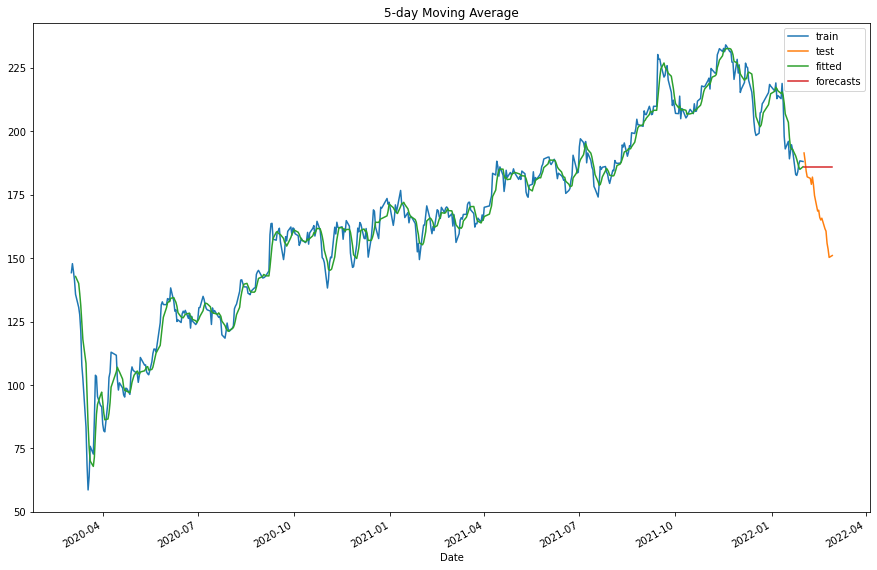

In [57]:
JDtr['JD_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
JDte['JD_Price'].plot(label='test')
ma5['JD_Price'].plot(label='fitted')
JDma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [58]:
MAE(JDte['JD_Price'],JDma5fcsts)

16.321500701904302

In [59]:
MSE(JDte['JD_Price'],JDma5fcsts)

393.5935889557075

In [60]:
print(
    'MAE: {:,.4f}'.format(MAE(JDte['JD_Price'],JDma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(JDte['JD_Price'],JDma5fcsts))
                         )

MAE: 16.3215 
MSE: 393.5936


### Single Exponential Smoothing

In [61]:
JDses=SES(JDtr['JD_Price'],initialization_method="estimated").fit()

/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [62]:
JDsesfcsts=JDses.forecast(20)
JDsesfcsts.index=JDte.index

/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


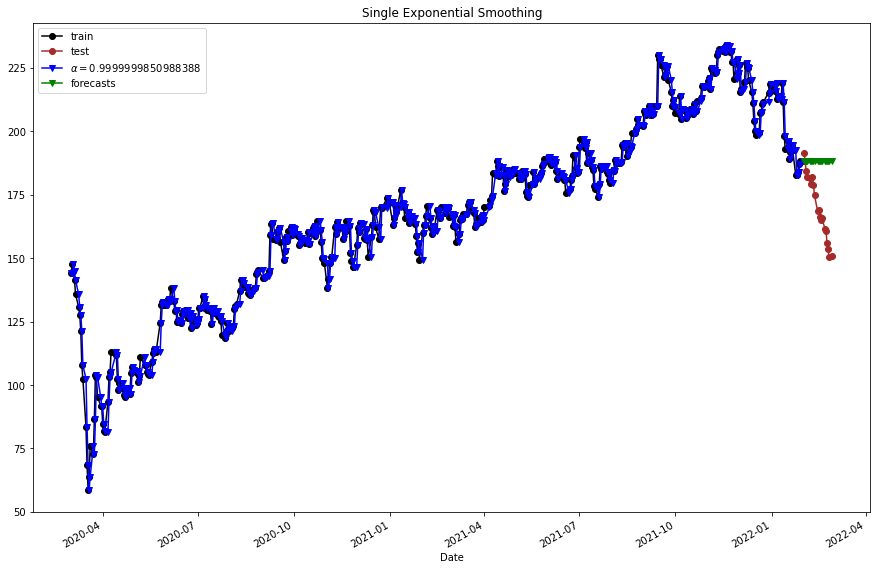

In [63]:
JDtr['JD_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
JDte['JD_Price'].plot(marker='o',color='brown',label='test')
JDses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%JDses.model.params['smoothing_level'])
JDsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [64]:
print(
    'MAE: {:,.4f}'.format(MAE(JDte['JD_Price'],JDsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(JDte['JD_Price'],JDsesfcsts))
)

MAE: 17.9775 
MSE: 462.2452


### Double Exponential Smoothing

In [65]:
JDdes=DES(JDtr['JD_Price'],initialization_method="estimated").fit()

/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [66]:
JDdesfcsts=JDdes.forecast(20)
JDdesfcsts.index=JDte.index

/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


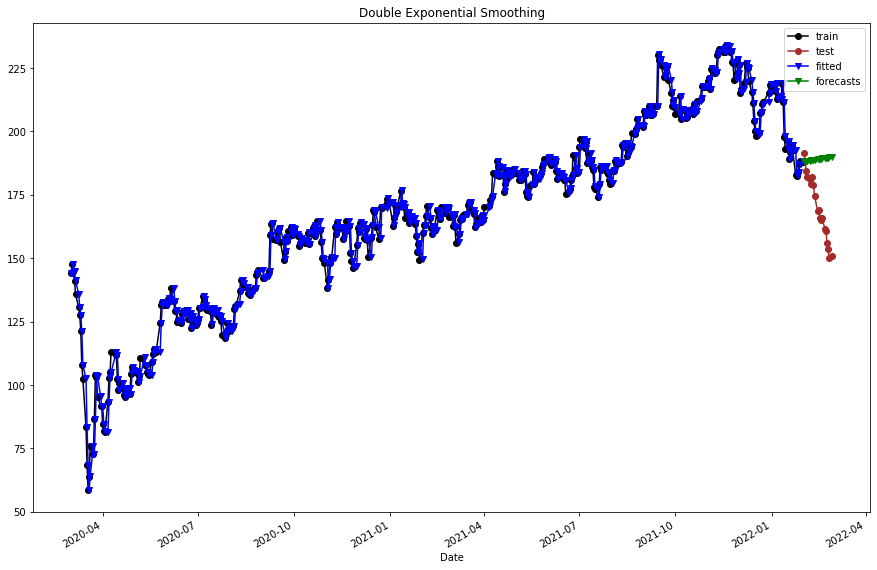

In [67]:
JDtr['JD_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
JDte['JD_Price'].plot(marker='o',color='brown',label='test')
JDdes.fittedvalues.plot(marker='v', color='blue',label='fitted')
JDdesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [68]:
print(
    'MAE: {:,.4f}'.format(MAE(JDte['JD_Price'],JDdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(JDte['JD_Price'],JDdesfcsts))
)

MAE: 18.9034 
MSE: 509.7703


### Holt's Winters (Additive)

In [69]:
JDtesa=TES(JDtr['JD_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
JDtesfcstsa=JDtesa.forecast(20)
JDtesfcstsa.index=JDte.index

/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


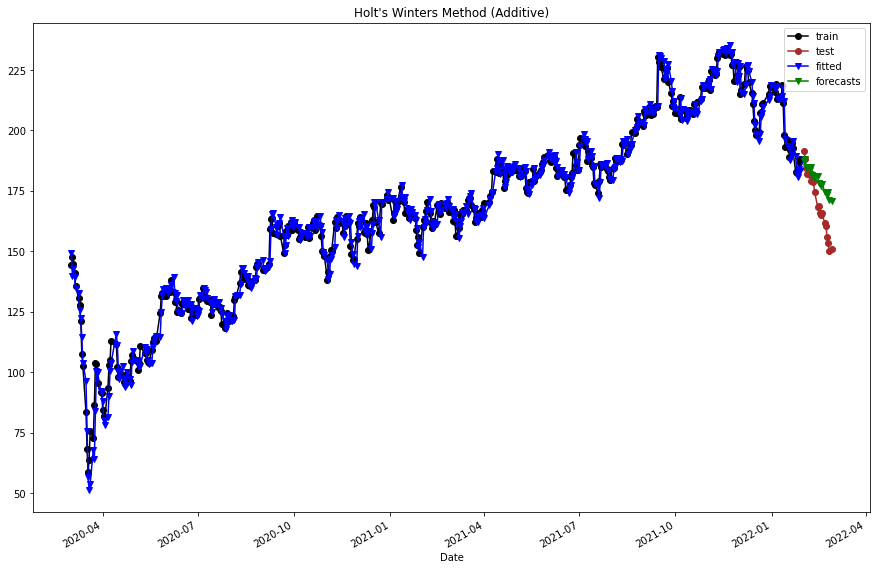

In [70]:
JDtr['JD_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
JDte['JD_Price'].plot(marker='o',color='brown',label='test')
JDtesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
JDtesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [71]:
print(
    'MAE: {:,.4f}'.format(MAE(JDte['JD_Price'],JDtesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(JDte['JD_Price'],JDtesfcstsa))
)

MAE: 9.4278 
MSE: 136.2615


### Holt's Winters (Multiplicative)

In [72]:
JDtesm=TES(JDtr['JD_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
JDtesfcstsm=JDtesm.forecast(20)
JDtesfcstsm.index=JDte.index

/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ml/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


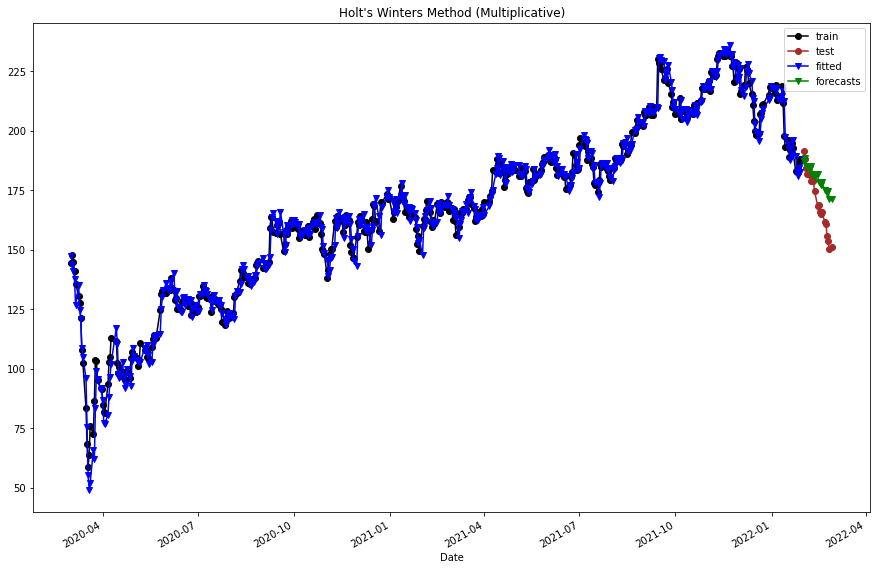

In [73]:
JDtr['JD_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
JDte['JD_Price'].plot(marker='o',color='brown',label='test')
JDtesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
JDtesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [74]:
print(
    'MAE: {:,.4f}'.format(MAE(JDte['JD_Price'],JDtesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(JDte['JD_Price'],JDtesfcstsm))
)

MAE: 9.6347 
MSE: 141.7781
